# Lesson 4
# Houda Aynaou

## Workplace Scenario
You are working for a data science consulting company. Your company is approached by a client requesting that you analyze crime data across the United States using [Communities and Crime dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/communities/). At first glance, you notice that the data has 128 attributes and cannot be examined manually. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR. You are tasked to **identify which are the most important features or attributes that contribute to crime**. 

Generally, such data might be used for predictive policing, where police departments can predict potential criminal activity so they can ensure they are properly staffed and the areas of concern are patrolled accordingly.

## To do:
1. Read data.
2. Apply three techniques for filter selection:
    - Filter methods
    - Wrapper methods
    - Embedded methods.
3. Describe your findings.

# 1. Data

In [30]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import linear_model


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Data
LINK = 'https://raw.githubusercontent.com/houdaaynaou/DS-Certificate-UW/master/Course%203%20Machine%20Learning%20Techniques/Data/communities_crimes.csv'
data = pd.read_csv(LINK, header = None)

In [3]:
# column names :
columns = ['state', 'county', 'community', 'communityname', 'fold', 'population',
           'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 
           'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 
           'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 
           'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 
           'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 
           'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 
           'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 
           'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
           'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 
           'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 
           'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 
           'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup',
           'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 
           'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 
           'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 
           'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 
           'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 
           'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 
           'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 
           'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 
           'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 
           'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 
           'ViolentCrimesPerPop']

data.columns = columns
data.head()


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


The dataset has **1994** rows and **128** columns.

In [5]:
# data types
data.dtypes

state                     int64
county                   object
community                object
communityname            object
fold                      int64
population              float64
householdsize           float64
racepctblack            float64
racePctWhite            float64
racePctAsian            float64
racePctHisp             float64
agePct12t21             float64
agePct12t29             float64
agePct16t24             float64
agePct65up              float64
numbUrban               float64
pctUrban                float64
medIncome               float64
pctWWage                float64
pctWFarmSelf            float64
pctWInvInc              float64
pctWSocSec              float64
pctWPubAsst             float64
pctWRetire              float64
medFamInc               float64
perCapInc               float64
whitePerCap             float64
blackPerCap             float64
indianPerCap            float64
AsianPerCap             float64
                         ...   
PctSameH

In [6]:
# Replacing missing data with NaN
rep_data = data.where(data !='?').astype('float', errors= 'ignore')
rep_data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8.0,NaN,NaN,Lakewoodcity,1.0,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53.0,NaN,NaN,Tukwilacity,1.0,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24.0,NaN,NaN,Aberdeentown,1.0,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34.0,5,81440,Willingborotownship,1.0,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42.0,95,6096,Bethlehemtownship,1.0,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [7]:
# Converting data type:
# df = rep_data
rep_data.dtypes

state                   float64
county                   object
community                object
communityname            object
fold                    float64
population              float64
householdsize           float64
racepctblack            float64
racePctWhite            float64
racePctAsian            float64
racePctHisp             float64
agePct12t21             float64
agePct12t29             float64
agePct16t24             float64
agePct65up              float64
numbUrban               float64
pctUrban                float64
medIncome               float64
pctWWage                float64
pctWFarmSelf            float64
pctWInvInc              float64
pctWSocSec              float64
pctWPubAsst             float64
pctWRetire              float64
medFamInc               float64
perCapInc               float64
whitePerCap             float64
blackPerCap             float64
indianPerCap            float64
AsianPerCap             float64
                         ...   
PctSameH

In [8]:
# Number and % of Missing data in each column
missing = pd.DataFrame(rep_data.isnull().sum(), columns=['Total missing'])
missing['% missing'] = missing['Total missing']/100
missing.tail(10)

,Total missing,% missing
LandArea,0,0.00
PopDens,0,0.00
PctUsePubTrans,0,0.00
PolicCars,1675,16.75
PolicOperBudg,1675,16.75
LemasPctPolicOnPatr,1675,16.75
LemasGangUnitDeploy,1675,16.75
LemasPctOfficDrugUn,0,0.00
PolicBudgPerPop,1675,16.75
ViolentCrimesPerPop,0,0.00


In [9]:
# Columns with missing values:
col_miss = list(missing[missing['Total missing'] != 0].index)
col_miss

['county',
 'community',
 'OtherPerCap',
 'LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldOps',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'LemasTotReqPerPop',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctPolicWhite',
 'PctPolicBlack',
 'PctPolicHisp',
 'PctPolicAsian',
 'PctPolicMinor',
 'OfficAssgnDrugUnits',
 'NumKindsDrugsSeiz',
 'PolicAveOTWorked',
 'PolicCars',
 'PolicOperBudg',
 'LemasPctPolicOnPatr',
 'LemasGangUnitDeploy',
 'PolicBudgPerPop']

## 2.1. Filter methods

This method consists of removing columns by understand relations between the features. This is done looking at plots (EDA) and computing metrics such as coefficient of correlation to detect linear correlation between variablebs or mutual information coefficient to captures the strength of the association between two variables.


### 2.1.1 Coefficient of Correlation  

In [16]:
# Correlation
corr_coef = data.corr()
corr_coef.head()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
state,1.000000,-0.002857,-0.079569,-0.049505,-0.046154,0.213990,-0.318602,-0.210841,0.100622,0.036950,...,-0.356149,0.340611,0.151854,0.062087,0.127616,-0.040350,-0.137940,-0.021431,-0.075305,-0.211398
fold,-0.002857,1.000000,-0.007552,0.035488,0.003524,-0.004436,-0.001317,0.000915,-0.000151,0.007080,...,-0.000195,-0.025403,-0.021956,-0.035202,-0.027938,0.017846,-0.012570,-0.000541,-0.023780,-0.032577
population,-0.079569,-0.007552,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,...,0.172731,-0.125133,-0.123691,0.001610,-0.089638,0.713652,0.231897,0.270356,0.466352,0.367157
householdsize,-0.049505,0.035488,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,...,0.311107,-0.049253,-0.057842,-0.103109,-0.003277,-0.015078,-0.004072,-0.051506,-0.094368,-0.034923
racepctblack,-0.046154,0.003524,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,...,-0.098114,0.093494,-0.045646,0.056358,-0.002894,0.149758,0.095053,0.147023,0.260793,0.631264


In [17]:
# Features highly correlated with target variable
high_coef = list(corr_coef[corr_coef.loc[:,'ViolentCrimesPerPop'] >= 0.6].index)
high_coef 

['racepctblack', 'PctIlleg', 'ViolentCrimesPerPop']

The above features have a strong linear relationship with the target variable.

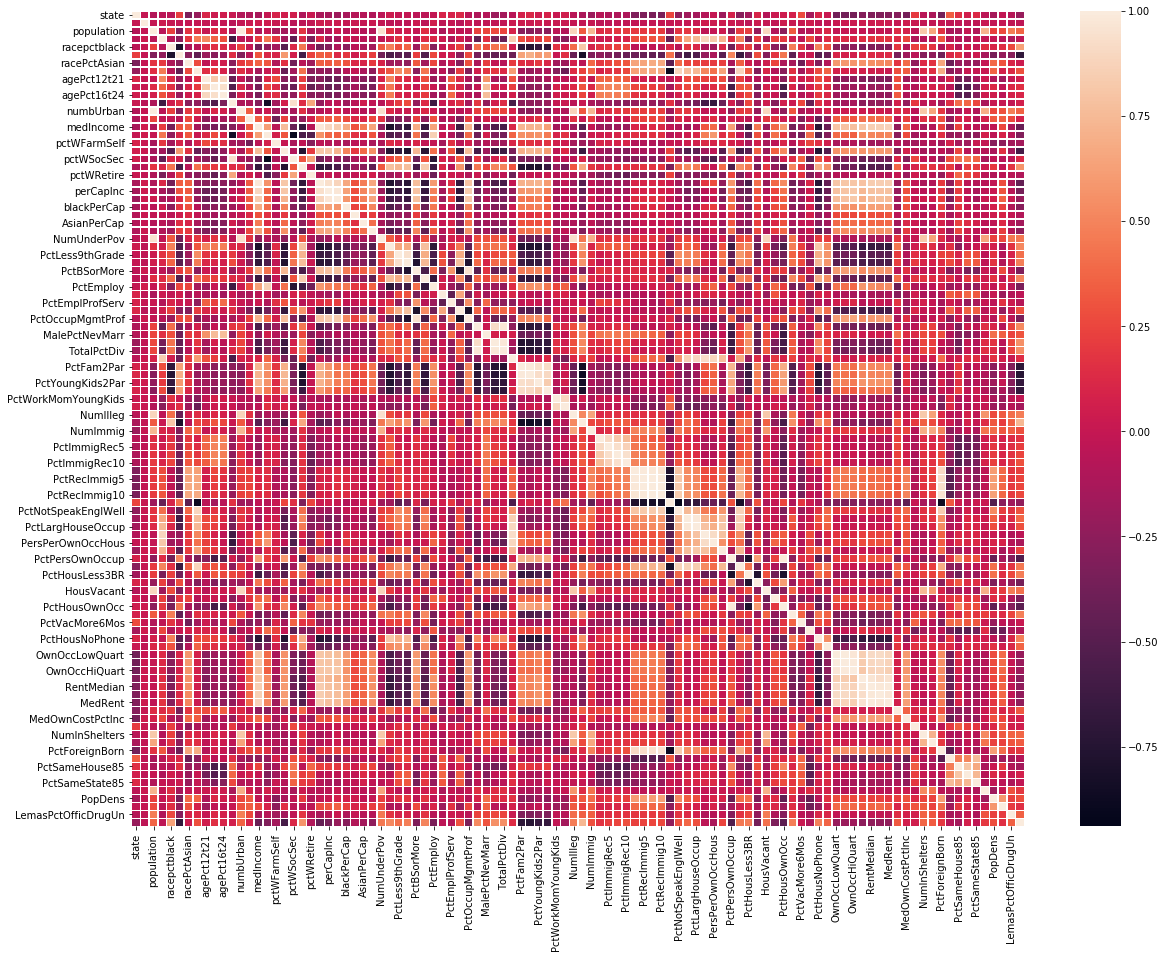

In [18]:
# Correlation heatmap:

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), linewidths=.5, ax=ax);


The heatmap shows that there strong linar relationship between the features.

### 2.1.2 Mutual information score:

In [19]:
# columns with missing values, string column communityname', and target 'ViolentCrimesPerPop', '
col_miss.extend(['ViolentCrimesPerPop', 'communityname'])

# Dropping missing values,'communityname' and Target:'ViolentCrimesPerPop'
X = rep_data.drop(col_miss, axis=1)
# Target
Y = rep_data['ViolentCrimesPerPop']

# function to compute mutual information between remaining feature and target variabe
minfo = []
def calc_MI(x, y, df, bins):
    for col in x:
        c_xy = np.histogram2d(df[col], y, bins)[0]
        minfo.append(mutual_info_score(None, None, contingency = c_xy).round(3))
    
calc_MI(X, Y, rep_data, 20)

# mutual information between features with non missing values and Target variable:
df_mi = pd.DataFrame(minfo, index= X.columns, columns=['ViolentCrimesPerPop'])
df_mi.head()


,ViolentCrimesPerPop
state,0.187
fold,0.054
population,0.157
householdsize,0.115
racepctblack,0.335


In [21]:
# column with the higher mutual information
df_mi[df_mi.iloc[:, 0] == df_mi.iloc[:, 0].max()]

,ViolentCrimesPerPop
PctKids2Par,0.51


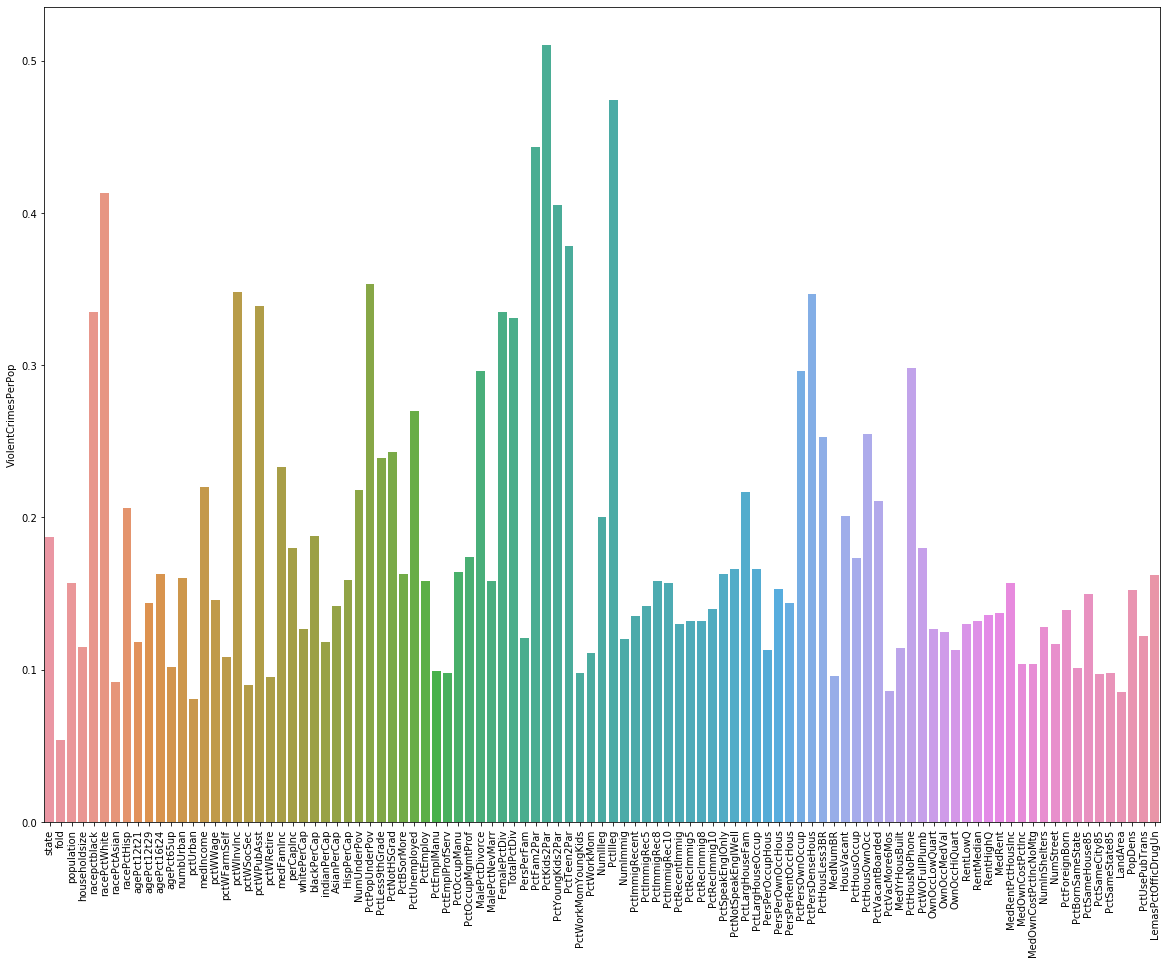

In [22]:
# Bar plot of mutual information
plt.figure(figsize=(20,15))
_ = sns.barplot(x = df_mi.index, y = df_mi['ViolentCrimesPerPop'], data = df_mi)
_ = plt.xticks(rotation='vertical')
plt.show()


In [24]:
# list of columns with high mutual information coefficient 
dropped_features = list(df_mi[df_mi.iloc[:, 0] > 0.3].index)
dropped_features

['racepctblack',
 'racePctWhite',
 'pctWInvInc',
 'pctWPubAsst',
 'PctPopUnderPov',
 'FemalePctDiv',
 'TotalPctDiv',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctIlleg',
 'PctPersDenseHous']

In [25]:
# dropping values with mutual information higher than 0.3 

filter_selected_features = list(df_mi[df_mi.iloc[:, 0] < 0.3].index)
selected_df = rep_data[filter_selected_features].head()
selected_df

,state,fold,population,householdsize,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,8.0,1.0,0.19,0.33,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,53.0,1.0,0.00,0.16,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,24.0,1.0,0.00,0.42,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,34.0,1.0,0.04,0.77,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,42.0,1.0,0.01,0.55,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00


The above features have strengh association with the target variable, meaning they vary together.

In [27]:
print('We selected {} features out of {} features using filter methods by dropping columns with missing values and columns with high mutual information score with the target variable'.format(selected_df.shape[1], data.shape[1]))      

We selected 88 features out of 128 features using filter methods by dropping columns with missing values and columns with high mutual information score with the target variable


## 2.2. Wrapper methods

The wrapper methods for feature selection include step-wise(backwards and forward) feature selection, which is an iterative algorithm. 

### 2.2.1 Backwards selection with RFE

In [29]:

# Dropping string column
rep_data2= rep_data.drop('communityname', axis=1 )

# Notmalizing the data 
scaler = StandardScaler()
scaler.fit(rep_data2)

data_normalized = pd.DataFrame(scaler.transform(rep_data2), columns= rep_data2.columns).astype('float')

# Filling missing with -1
data_normalized = data_normalized.fillna(-1)
data_normalized.head()


,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,-1.261697,-1.000000,-1.000000,-1.564227,1.043612,-0.814997,-0.630002,0.599578,-0.161288,0.111765,...,0.500488,0.133699,0.167316,-0.4808,-0.262228,0.942898,0.147002,0.940399,-0.334905,-0.163051
1,1.483304,-1.000000,-1.000000,-1.564227,-0.453937,-1.853636,-0.235335,-0.056219,1.418982,-0.318466,...,-0.413323,-0.555817,1.259032,-1.0000,-1.000000,-1.000000,-1.000000,-0.391447,-1.000000,1.854753
2,-0.285697,-1.000000,-1.000000,-1.564227,-0.453937,-0.265129,1.224931,-0.793990,0.078147,-0.447535,...,-0.504705,-0.112556,-0.618719,-1.0000,-1.000000,-1.000000,-1.000000,-0.391447,-1.000000,0.824385
3,0.324303,-0.426036,1.394215,-1.564227,-0.138663,1.873246,3.237730,-2.761379,-0.161288,-0.189397,...,-0.413323,0.773964,0.516665,-1.0000,-1.000000,-1.000000,-1.000000,-0.391447,-1.000000,-0.506507
4,0.812304,0.286308,-1.585665,-1.564227,-0.375118,0.529125,-0.630002,0.804514,-0.304949,-0.404512,...,-0.230561,-0.703570,-0.618719,-1.0000,-1.000000,-1.000000,-1.000000,-0.391447,-1.000000,-0.892895


In [32]:
features = data_normalized.drop('ViolentCrimesPerPop', axis=1)
target = data_normalized['ViolentCrimesPerPop']

# Backwards selection with RFE with default parameters
estimator = LinearRegression()
back_selector = RFE(estimator, step = 1, verbose = True) 
back_selector = back_selector.fit(features, target)

Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
F

The backward selection run started with 126 features, but ended with half of them, throwing out one feature at every step.

In [33]:
# The mask of selected features:

selected_findices = back_selector.get_support(indices=True)
rfe_selected_features = list(features.iloc[:, back_selector.get_support(indices=True)].columns)

print('List of selected features names:')
rfe_selected_features

List of selected features names:


['county',
 'population',
 'racepctblack',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWInvInc',
 'pctWSocSec',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctEmploy',
 'PctEmplManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctKids2Par',
 'PctWorkMom',
 'PctIlleg',
 'NumImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctNotSpeakEnglWell',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PersPerOwnOccHous',
 'PersPerRentOccHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'HousVacant',
 'PctHousOwnOcc',
 'OwnOccLowQuart',
 'OwnOccMedVal',
 'RentLowQ',
 'RentHighQ',
 'MedRent',
 'MedOwnCostPctIncNoMtg',
 'NumStreet',
 'PctForeignBorn',
 'LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctP

In [34]:
# Order in which features were removed
print("Ranking is the inverse of order of removal (higher rank is the first feature removed):")
print(back_selector.ranking_)

Ranking is the inverse of order of removal (higher rank is the first feature removed):
[11  1 44 45  1 56  1  8 27  1  1  1  1 50  1  1  1  1 19  1  1 53  1  1
  1  1 34 40 48 17 37 25  1  1  1 42 60  1  1 57  2  1  1  1  1  1  1 59
  1 20 64 21  1  3  1  1 39 46 35 36 38  1  1 12 26  1 62  1  1  1  1  1
  1 23 24  1 15  1  4  5 47 32 54  1  1 18  1 63  1  1 29 28  1 14  1  1
 16 58 61 51  1  1  7  1  1  9  1  1  1 33 30 13  1 31 52 43 41 49 55 22
  1  1 10  1  6  1]


### 2.2.2 Forward selection using SFS

In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

estimator = LinearRegression()
stepwise_selector = SFS(estimator, 
    k_features = "parsimonious", 
    forward = True, 
    floating = False, 
    scoring = 'neg_mean_squared_error', 
    cv = 10)

stepwise_selector = stepwise_selector.fit(features.values, target)

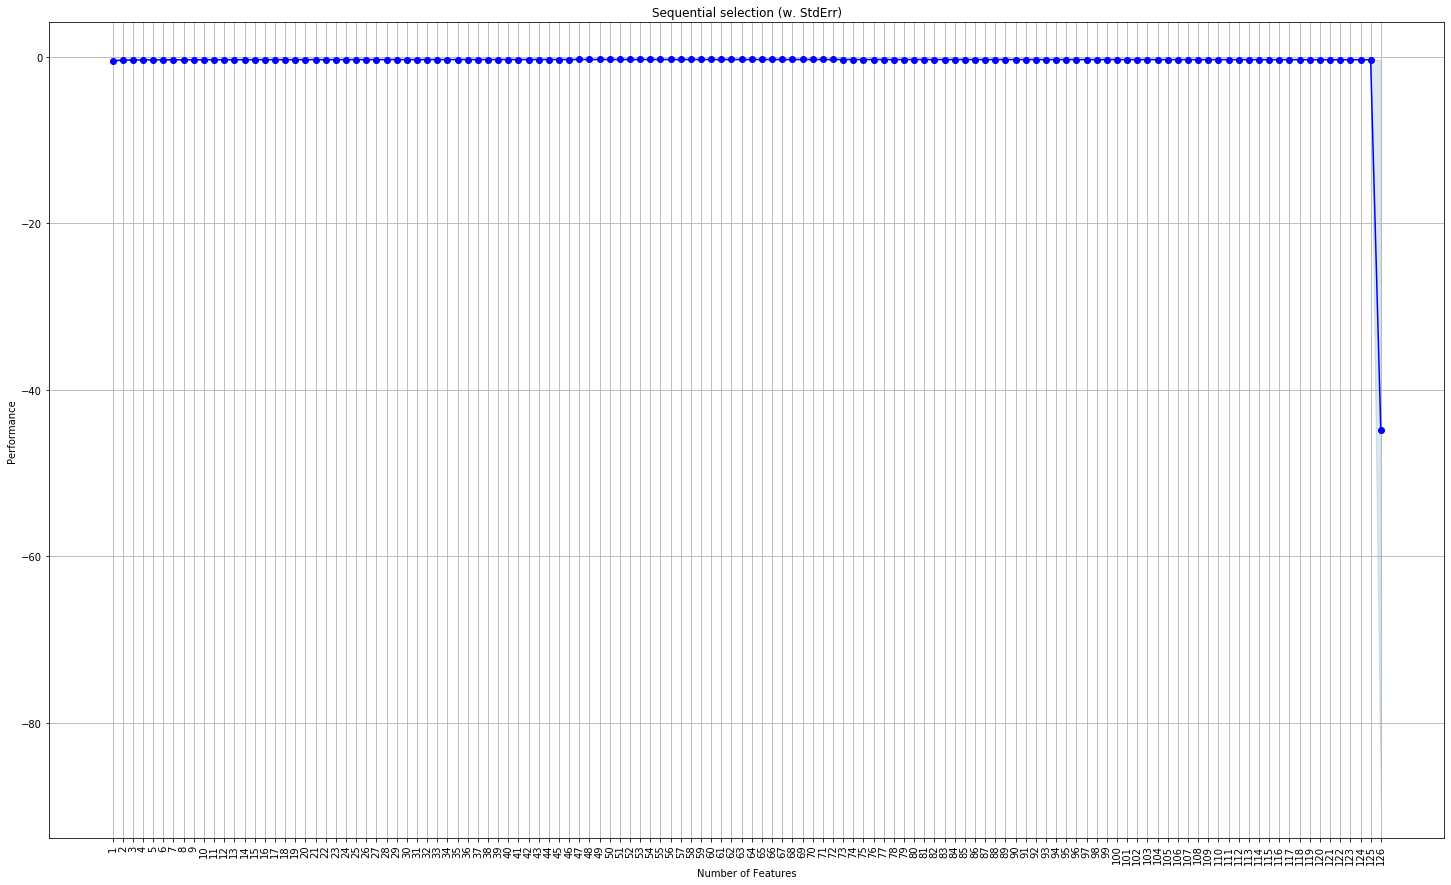

In [37]:
# Plot of model performance as feature selection happens

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

_= plot_sfs(stepwise_selector.get_metric_dict(), kind = 'std_err', figsize=(25, 15));
_ = plt.title('Sequential selection (w. StdErr)')
_ = plt.grid()
_=  plt.xticks(rotation='vertical')
plt.show()


## 2.3. Embedded methods
Embedded methods consists of using the regularization withing the algorithm to do feature selection.

### 2.3.1 Lasso regularization 

In [38]:
# setting alpha value to 0.02
alpha = 0.02
clf = linear_model.Lasso(alpha = alpha)
clf.fit(features, target)

print(clf.intercept_)

-0.0036639747155761174


In [39]:
# Features coefficients
lasso_dd = pd.DataFrame({'col': features.columns, 'coef': clf.coef_})
lasso_dd.head()

,col,coef
0,state,-0.052028
1,county,-0.041827
2,community,-0.000000
3,fold,-0.003629
4,population,0.000000


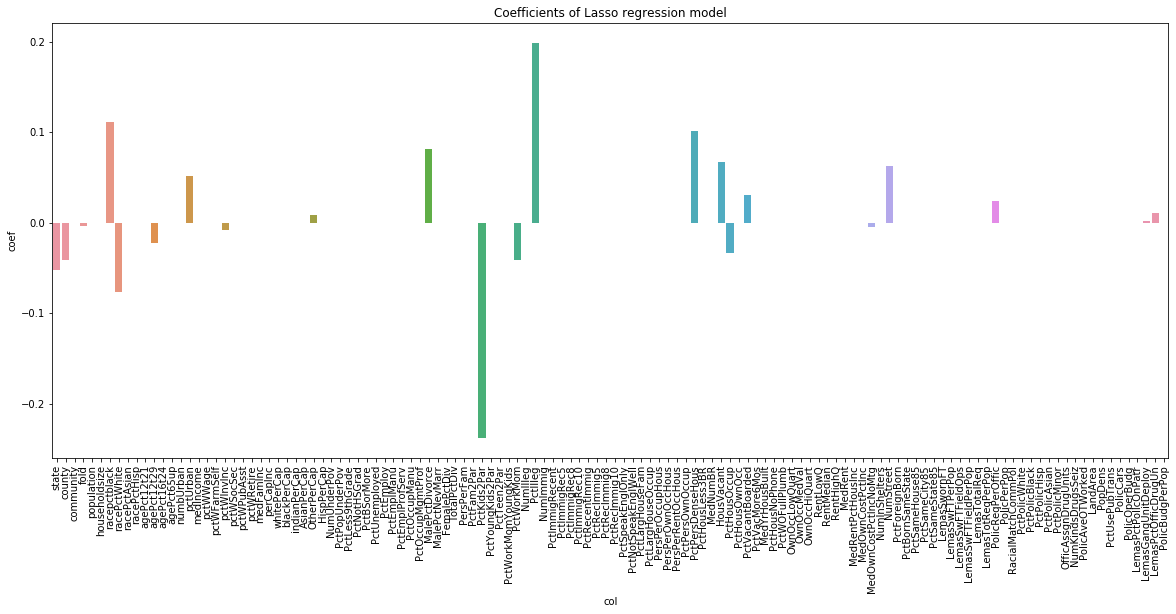

In [40]:
# Bar plot of model coefficients
plt.figure(figsize=(20,8))
_ = sns.barplot(x = 'col', y = 'coef', data = lasso_dd)
_ = plt.xticks(rotation = 'vertical')
_ = plt.title('Coefficients of Lasso regression model')
plt.show()

In [41]:
# List of features selected by the model: 

lasso_selected_features = list(lasso_dd[lasso_dd.loc[:, 'coef'] != 0]['col'])
print('List of selected features by Lasso regularization')
lasso_selected_features

List of selected features by Lasso regularization


['state',
 'county',
 'fold',
 'racepctblack',
 'racePctWhite',
 'agePct12t29',
 'pctUrban',
 'pctWInvInc',
 'OtherPerCap',
 'MalePctDivorce',
 'PctKids2Par',
 'PctWorkMom',
 'PctIlleg',
 'PctPersDenseHous',
 'HousVacant',
 'PctHousOccup',
 'PctVacantBoarded',
 'MedOwnCostPctIncNoMtg',
 'NumStreet',
 'PolicReqPerOffic',
 'LemasGangUnitDeploy',
 'LemasPctOfficDrugUn']

In [42]:
print('Number of features selected:')
len(lasso_selected_features)

Number of features selected:


22

### 2.3.2 Ridge regularization 

In [43]:
# Setting alpha value:
alpha = 0.02
ridge_clf = linear_model.Ridge(alpha = alpha)
ridge_clf.fit(features, target)

print(clf.intercept_)

-0.0036639747155761174


In [44]:
# Bar plot of model coefficients
ridge_dd = pd.DataFrame({'col': features.columns, 'coef': ridge_clf.coef_})
ridge_dd.head()

,col,coef
0,state,-0.035794
1,county,-0.076313
2,community,-0.021781
3,fold,-0.018639
4,population,0.166893


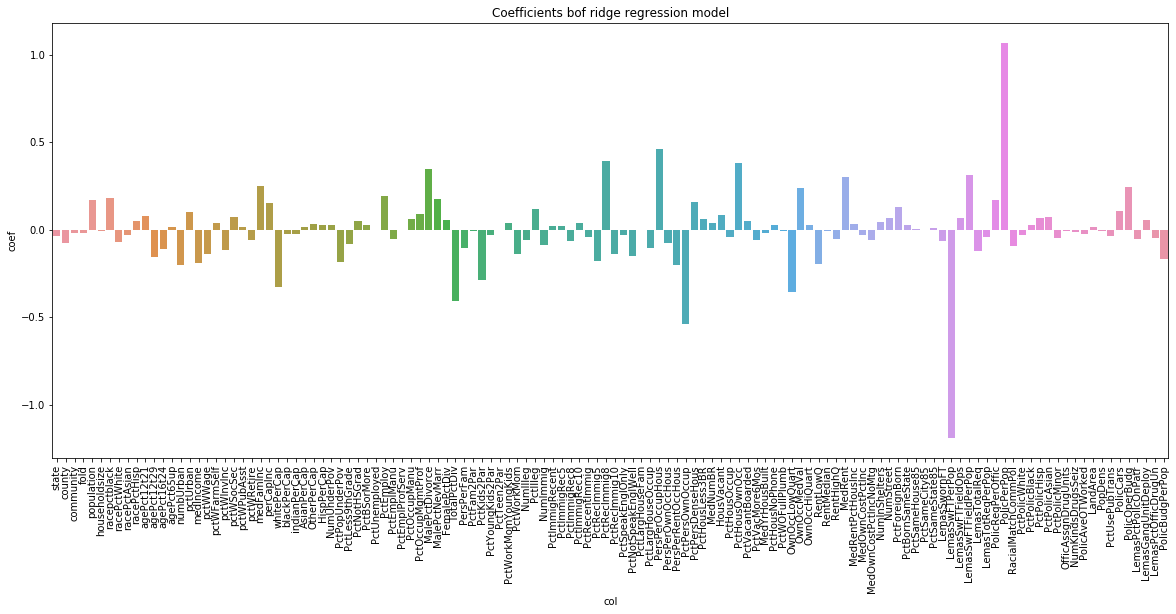

In [45]:
# Plot of ridge regularization coefficients:

plt.figure(figsize=(20,8))
_ = sns.barplot(x = 'col', y = 'coef', data = ridge_dd)
_ = plt.xticks(rotation = 'vertical')
_ = plt.title('Coefficients bof ridge regression model')
plt.show()

Ridge regression does not result in feature selection like it did with LASSO.

## Summary: Number of features selected by each method:

In [47]:
summary= pd.DataFrame(np.array([len(filter_selected_features), len(rfe_selected_features), len(lasso_selected_features)]),
                      index=('Filter Method', 'RFE Method', 'Lasso Regularization'),
                      columns = ['Features selected'])
summary


,Features selected
Filter Method,88
RFE Method,63
Lasso Regularization,22


In [48]:
# Lasso selected features:

lasso_in_filter = []

for i in lasso_selected_features:
    if i in filter_selected_features:
        lasso_in_filter.append(i)

lasso_in_rfe = []
for i in lasso_selected_features:
    if i in rfe_selected_features:
        lasso_in_rfe.append(i)
        
print('{} features selected by Lasso also got selected by filter methods'.format(len(lasso_in_filter)))
print('{} features selected by Lasso also got selected by RFE wrapper methods'.format(len(lasso_in_rfe)))


12 features selected by Lasso also got selected by filter methods
15 features selected by Lasso also got selected by RFE wrapper methods


In [49]:
# RFE wrapper selected features

rfe_in_filter = []

for i in rfe_selected_features:
    if i in filter_selected_features:
        rfe_in_filter.append(i)
        
rfe_in_lasso = []        
for i in rfe_selected_features:
    if i in lasso_selected_features:
        rfe_in_lasso.append(i)

print('{} features selected by RFE wrapper also got selected by filter methods'.format(len(rfe_in_filter)))
print('{} features selected by RFE wrapper also got selected by Lasso regularization'.format(len(rfe_in_lasso)))


42 features selected by RFE wrapper also got selected by filter methods
15 features selected by RFE wrapper also got selected by Lasso regularization


In [50]:
## Filter methods selected features
filter_in_lasso = []
for i in filter_selected_features:
    if i in lasso_selected_features:
        filter_in_lasso.append(i)

filter_in_rfe = []
for i in rfe_selected_features:
    if i in rfe_selected_features:
        filter_in_rfe.append(i)
print('{} features selected by Filter methods also got selected by Lasso regularization'.format(len(filter_in_lasso)))
print('{} features selected by Filter methods also got selected by RFE wrapper methods'.format(len(filter_in_rfe)))


12 features selected by Filter methods also got selected by Lasso regularization
63 features selected by Filter methods also got selected by RFE wrapper methods


## 3. Results

The goal of this assignement was to identify which are the most important features or attributes that contribute to crime.

Different methods where used to get the features valuable for the model in order to increase its performance. 
- In `Filter methods`, feature selection is based mainly on corrlation coeffecient and mutual information score between features and target variable.
- `Wrapper methods` consists of 2 methods which are backward selection using Recursive Feature Elimination algorithm and forward selection using Sequential Feature Selector algorithm.

- For `Embedded methods` feature selection is considered a by product of Lasso regularization since it penalize irrelevant features coefficients to 0. 

Each of the above methods yield diffrent results in terms of number of features selected as illustrated in the summary table. However, we can see that methods agreed on keeping same features as analyzed:

- 12 features selected by Lasso also got selected by filter methods.
- 15 features selected by Lasso also got selected by RFE wrapper methods.
- 42 features selected by RFE wrapper also got selected by filter methods.
- 15 features selected by RFE wrapper also got selected by Lasso regularization.
- 12 features selected by Filter methods also got selected by Lasso regularization.
- 63 features selected by Filter methods also got selected by RFE wrapper methods.

Finally, it's important to note that the number of features selected features is subject to change according to the parameter identified by the method used and also the goal of the project.